![TEXT](../1.-%20Proyecto%20EDA%202%20%5BEntregable%5D/Residuos2.jpg)

In [235]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2 # Para operar con imágenes
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from glob import glob
from tqdm import tqdm

In [189]:
TRAIN_PATH = 'C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\TRAIN'
TEST_PATH = 'C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\TEST'

In [190]:
os.listdir('C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\TRAIN')

['O', 'R']

In [191]:
os.listdir('C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\TEST')

['O', 'R']

In [192]:
class_names = ['O','R']

# Tamaño aproximado de la muestra
IMAGE_SIZE = (300,300)

In [217]:
class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
class_names_label

{'O': 0, 'R': 1}

In [218]:
PATH = 'C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\'
TRAIN_PATH = 'C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\TRAIN\\'
TEST_PATH = 'C:\\Users\\iPac\\Downloads\\EDEM\\EDEM\\1.- Proyecto EDA 2 [Entregable]\\archive\DATASET\\TEST\\'

In [251]:
def read_data(path, im_size,class_names_label):
    X=[]
    y=[]

    for folder in os.listdir(path):
        label=class_names_label[folder]
        folder_path = os.path.join(path,folder)
        # Iterar sobre lo que haya en el path
        for file in os.listdir(folder_path):
            image_path=os.path.join(folder_path,file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, im_size)
            X.append(image)
            y.append(label)

    return np.array(X),np.array(y)

X_train, y_train = read_data(TRAIN_PATH,IMAGE_SIZE,class_names_label)
X_test, y_test=read_data(TEST_PATH,IMAGE_SIZE,class_names_label)

print(X_train.shape)
print(X_test.shape)

(800, 300, 300, 3)
(200, 300, 300, 3)


In [252]:
X_train[0].shape

(300, 300, 3)

In [253]:
X_train[0]

array([[[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [251, 251, 253],
        [251, 251, 253],
        [251, 251, 253]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [251, 251, 253],
        [251, 251, 253],
        [251, 251, 253]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [251, 251, 253],
        [251, 251, 253],
        [251, 251, 253]],

       ...,

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]]

<Axes: >

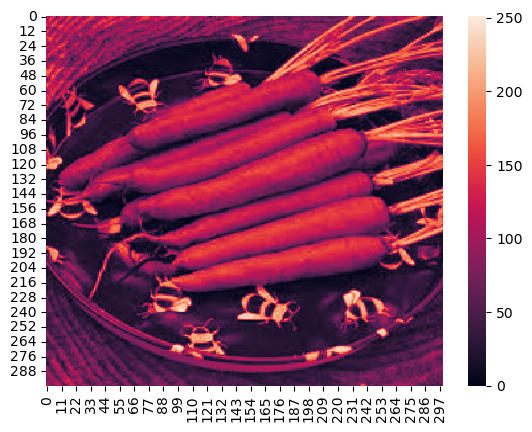

In [254]:
sns.heatmap(X_train[1,:,:,1])

In [255]:
x_data = [] 
y_data = [] 

for category in glob(TRAIN_PATH+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

data=pd.DataFrame({'image': x_data,'label': y_data})

In [224]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=[IMAGE_SIZE[0],IMAGE_SIZE[1],3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [225]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 341056)            0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [227]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [243]:
# Normalizamos
X_train_scal = X_train.astype("float32")/255
X_test_scal = X_test.astype("float32")/255

In [205]:
history = model.fit(X_train_scal,y_train,batch_size=4,epochs=20,validation_split=0.1)

Epoch 1/20
180/180 [==============================] - 87s 471ms/step - loss: 1.0366 - accuracy: 0.8278 - val_loss: 1.2293 - val_accuracy: 0.6125
Epoch 2/20
180/180 [==============================] - 84s 469ms/step - loss: 0.2854 - accuracy: 0.9000 - val_loss: 1.7974 - val_accuracy: 0.6750
Epoch 3/20
180/180 [==============================] - 84s 468ms/step - loss: 0.4494 - accuracy: 0.8889 - val_loss: 0.6365 - val_accuracy: 0.8250
Epoch 4/20
180/180 [==============================] - 84s 468ms/step - loss: 0.1338 - accuracy: 0.9472 - val_loss: 0.5146 - val_accuracy: 0.8000
Epoch 5/20
180/180 [==============================] - 85s 470ms/step - loss: 0.0581 - accuracy: 0.9819 - val_loss: 1.2434 - val_accuracy: 0.7500
Epoch 6/20
180/180 [==============================] - 84s 469ms/step - loss: 0.1071 - accuracy: 0.9653 - val_loss: 2.0380 - val_accuracy: 0.4750
Epoch 7/20
180/180 [==============================] - 84s 469ms/step - loss: 0.1280 - accuracy: 0.9583 - val_loss: 1.9643 - val_ac

In [1]:
df_hist=pd.DataFrame(history.history)
df_hist

NameError: name 'pd' is not defined

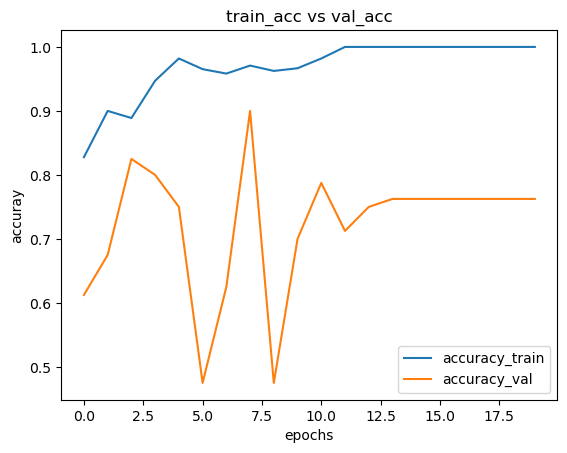

In [208]:
plt.figure()
plt.plot(df_hist['accuracy'],label="accuracy_train")
plt.plot(df_hist['val_accuracy'],label="accuracy_val")
plt.title("train_acc vs val_acc")
plt.ylabel("accuray")
plt.xlabel("epochs")
plt.legend()

In [236]:
## Con 7 épocas parece la mejor opción, vamos a probar otras opciones de modelo.

In [209]:
# 82% de precisión, el modelo podría mejorar
results = model.evaluate(X_test_scal,y_test)

7/7 [==============================] - 2s 229ms/step - loss: 1.9821 - accuracy: 0.8250


In [210]:
predictions = model.predict(X_test_scal)
predictions.round()

7/7 [==============================] - 2s 225ms/step


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [211]:
# Tenemos 10 imágenes de predicción por número, los que son distintos en la serie es que lo clasifica mal.
pred_labels = np.argmax(predictions,axis=1)
pred_labels

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1], dtype=int64)

<Axes: >

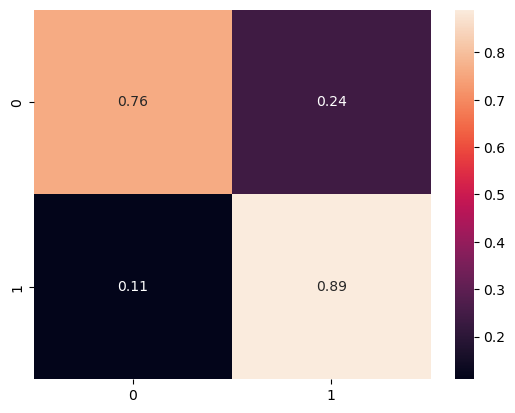

In [213]:
c_mat = confusion_matrix(y_test,pred_labels)
sns.heatmap(c_mat/np.sum(c_mat,axis=1),annot=True)

In [228]:
history = model.fit(X_train_scal,y_train,batch_size=6,epochs=10,validation_split=0.1)

Epoch 1/10
120/120 [==============================] - 65s 530ms/step - loss: 2.8461 - accuracy: 0.8056 - val_loss: 1.0798 - val_accuracy: 0.5750
Epoch 2/10
120/120 [==============================] - 63s 527ms/step - loss: 0.1663 - accuracy: 0.9347 - val_loss: 0.1536 - val_accuracy: 0.9375
Epoch 3/10
120/120 [==============================] - 63s 527ms/step - loss: 0.1291 - accuracy: 0.9528 - val_loss: 0.3043 - val_accuracy: 0.9125
Epoch 4/10
120/120 [==============================] - 63s 529ms/step - loss: 0.1176 - accuracy: 0.9569 - val_loss: 0.5613 - val_accuracy: 0.8750
Epoch 5/10
120/120 [==============================] - 63s 528ms/step - loss: 0.1979 - accuracy: 0.9375 - val_loss: 1.4282 - val_accuracy: 0.7625
Epoch 6/10
120/120 [==============================] - 63s 527ms/step - loss: 0.1630 - accuracy: 0.9472 - val_loss: 0.3178 - val_accuracy: 0.9375
Epoch 7/10
120/120 [==============================] - 63s 526ms/step - loss: 0.2340 - accuracy: 0.9236 - val_loss: 0.5380 - val_ac

In [229]:
df_hist=pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,2.846056,0.805556,1.079821,0.5750
1,0.166316,0.934722,0.153555,0.9375
2,0.129122,0.952778,0.304288,0.9125
3,0.117617,0.956944,0.561288,0.8750
4,0.197859,0.937500,1.428219,0.7625
5,0.162962,0.947222,0.317809,0.9375
6,0.234039,0.923611,0.538027,0.8250
7,0.085100,0.976389,2.765624,0.6875
8,0.078438,0.977778,1.044352,0.8875
9,0.033245,0.987500,0.459373,0.9250


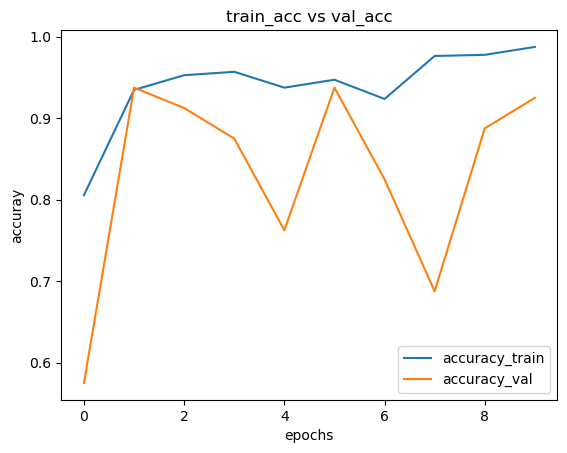

In [231]:
plt.figure()
plt.plot(df_hist['accuracy'],label="accuracy_train")
plt.plot(df_hist['val_accuracy'],label="accuracy_val")
plt.title("train_acc vs val_acc")
plt.ylabel("accuray")
plt.xlabel("epochs")
plt.legend()

In [232]:
# 77% de precisión, el valor es bajo porque las imágenes de validación son pocas
results = model.evaluate(X_test_scal,y_test)

7/7 [==============================] - 2s 227ms/step - loss: 2.6531 - accuracy: 0.7350


In [233]:
predictions = model.predict(X_test_scal)
predictions.round()

7/7 [==============================] - 2s 229ms/step


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [234]:
# Tenemos 10 imágenes de predicción por número, los que son distintos en la serie es que lo clasifica mal.
pred_labels = np.argmax(predictions,axis=1)
pred_labels

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1], dtype=int64)

In [244]:
history = model.fit(X_train_scal,y_train,batch_size=32,epochs=5,validation_split=0.1)

Epoch 1/5
23/23 [==============================] - 33s 1s/step - loss: 1.9575e-04 - accuracy: 1.0000 - val_loss: 1.7324 - val_accuracy: 0.8250
Epoch 2/5
23/23 [==============================] - 32s 1s/step - loss: 1.8803e-04 - accuracy: 1.0000 - val_loss: 1.7362 - val_accuracy: 0.8250
Epoch 3/5
23/23 [==============================] - 32s 1s/step - loss: 1.8190e-04 - accuracy: 1.0000 - val_loss: 1.7427 - val_accuracy: 0.8250
Epoch 4/5
23/23 [==============================] - 32s 1s/step - loss: 1.7588e-04 - accuracy: 1.0000 - val_loss: 1.7543 - val_accuracy: 0.8250
Epoch 5/5
23/23 [==============================] - 32s 1s/step - loss: 1.6969e-04 - accuracy: 1.0000 - val_loss: 1.7600 - val_accuracy: 0.8250


In [245]:
df_hist=pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,0.000196,1.0,1.732416,0.825
1,0.000188,1.0,1.736203,0.825
2,0.000182,1.0,1.742701,0.825
3,0.000176,1.0,1.754318,0.825
4,0.000170,1.0,1.759972,0.825


In [246]:
# 82% de precisión, el modelo podría mejorar
results = model.evaluate(X_test_scal,y_test)

7/7 [==============================] - 2s 223ms/step - loss: 2.2070 - accuracy: 0.8200


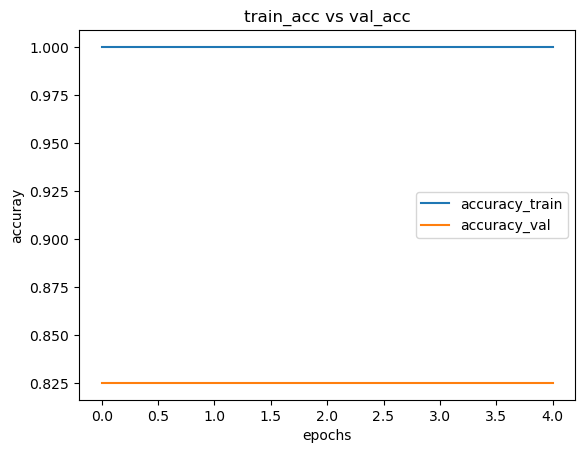

In [247]:
plt.figure()
plt.plot(df_hist['accuracy'],label="accuracy_train")
plt.plot(df_hist['val_accuracy'],label="accuracy_val")
plt.title("train_acc vs val_acc")
plt.ylabel("accuray")
plt.xlabel("epochs")
plt.legend()

In [249]:
# Tenemos 10 imágenes de predicción por número, los que son distintos en la serie es que lo clasifica mal.
pred_labels = np.argmax(predictions,axis=1)
pred_labels

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1], dtype=int64)

<Axes: >

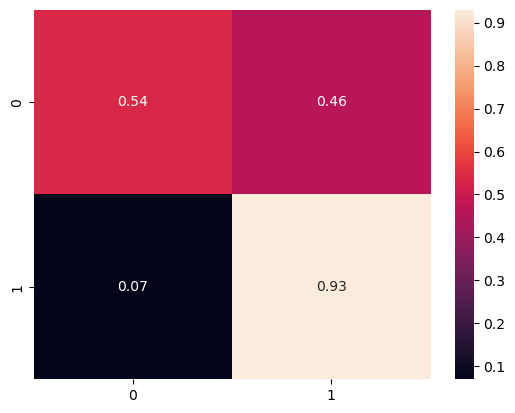

In [250]:
c_mat = confusion_matrix(y_test,pred_labels)
sns.heatmap(c_mat/np.sum(c_mat,axis=1),annot=True)